# Neuron population connectios

### import essential librarries

In [1]:
import synapticflow as sf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

### preparing datasts

In [17]:
def constant_cuurent():
    return [30] * 1000

In [20]:
def step_current():
    time = np.arange(1, 101, 0.05)
    value = [10.0]
    j = 1
    for i in range(1, len(time)):
        if i % 500 == 0:
            j += 1
        value.append(j * 10)
    current = pd.DataFrame({'time' : time, 
                            'value' : value})
    return current

In [21]:
def sin_function(x):
    return math.sin(x) * 10 + 10

def sin_current():
    time = np.arange(1, 101, 0.05)
    value = []
    j = 1
    for i in range(len(time)):
        value.append(sin_function(i))
    current = pd.DataFrame({'time' : time, 
                            'value' : value})
    return current

In [22]:
def plot_current(df):
  plt.figure(figsize = (6, 4))
  plt.plot(df)
  plt.xlabel('time(ms)')
  plt.ylabel('current(pA)')

## 1 - Random cooenction:  Fixed coupling probability

In [23]:
# setting parameters
number_nourons = 15
dt = 1

In [24]:
neurons_1 = sf.LIFPopulation(n = number_nourons, dt = dt, tau_s= 10, refrac_length=0, R = 20)

In [25]:
# run model.forward for our population with the connection mode
def process(input_curr, connection, population):
    inner_current = torch.zeros_like(torch.tensor([0] * 15))
    spikes_n = []
    voltage_n = []
    for current in input_curr:
        curr = torch.tensor([current] * 15) + inner_current
        population.forward(curr)
        spikes = population.s
        voltage_n.append(population.v)
        spikes_n.append(spikes)
        inner_current = connection.compute(spikes)
    return inner_current, population, spikes_n, voltage_n

In [26]:
connection = sf.SparseConnection(pre=neurons_1, post=neurons_1)

In [27]:
current = constant_cuurent()

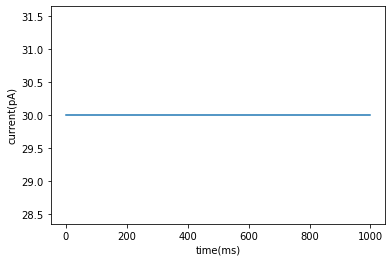

In [28]:
# plot the current
plot_current(current)

In [29]:
population_inner_current, population, spikes, voltage = process(current, connection, neurons_1)

In [30]:
population_inner_current

tensor([1.9315, 2.7585, 1.8633, 2.2398, 1.3423, 0.3574, 3.4220, 3.3037, 3.4234,
        2.8021, 3.5317, 2.6812, 1.3231, 2.4675, 1.4337])

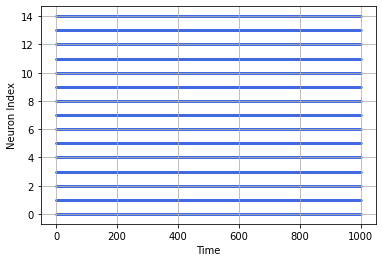

In [31]:
# raster plot 
sf.raster_plot(spikes, dt = 1)

### try step current

In [32]:
dt = 0.05

In [50]:
neurons_2 = sf.LIFPopulation(n = number_nourons, dt = dt, tau_s= 10, refrac_length=0, R = 20)

In [51]:
connection_1 = sf.SparseConnection(pre=neurons_2, post=neurons_2)

In [52]:
step_curr = step_current()

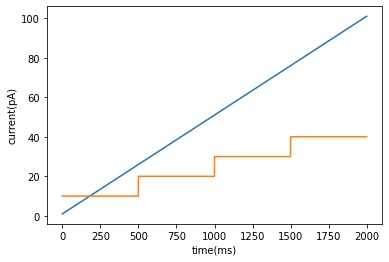

In [53]:
plot_current(step_curr)

In [54]:
population_inner_current, population, spikes, voltage = process(step_curr['value'], connection_1, neurons_2)

In [55]:
population_inner_current

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3742, 0.0000,
        0.0000, 0.0000, 0.4533, 0.0000, 0.7428, 0.4601])

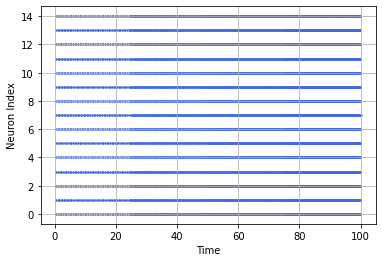

In [56]:
sf.raster_plot(spikes, dt = 0.05)

### sin current

In [57]:
dt = 0.05

In [58]:
neurons_3 = sf.LIFPopulation(n = 15, dt = dt, refrac_length=0)

In [59]:
current = sin_current()

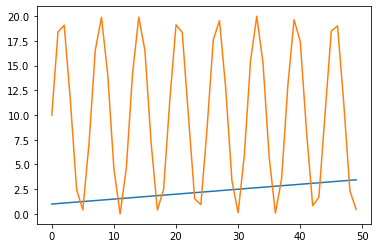

In [60]:
plt.plot(current[:50])[0]

In [61]:
connection_2 = sf.SparseConnection(pre=neurons_3, post=neurons_3)

In [62]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_2, neurons_3)

In [63]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

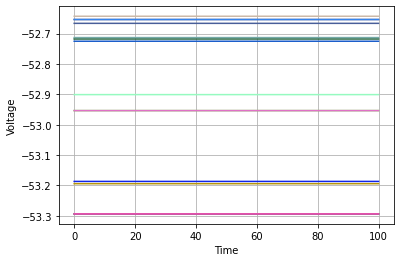

In [64]:
sf.plot_potential(voltage, dt = 0.05)

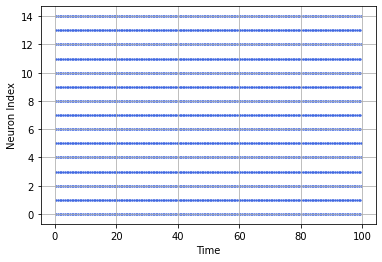

In [65]:
sf.raster_plot(spikes, dt = 0.05)

## Fully connected : Guassian distribution
we first try constant current

In [66]:
guassian_weight = torch.stack([abs(torch.randn(number_nourons)) for _ in range(number_nourons)], dim = 1)

In [67]:
current = constant_cuurent()

In [68]:
dt = 1

In [69]:
neurons_G1 = sf.LIFPopulation(n = 15, dt = dt)

In [70]:
connection_G1 = sf.Connection(pre = neurons_G1, post=neurons_G1, w = guassian_weight)

In [71]:
population_inner_current, population, spikes, voltage = process(current, connection_G1, neurons_G1)

In [72]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

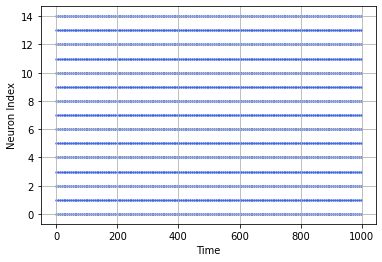

In [73]:
sf.raster_plot(spikes, dt = 1)

### try step current

In [74]:
dt = 0.05

In [75]:
neurons_G2 = sf.LIFPopulation(n = 15, dt = dt)

In [76]:
connection_G2 = sf.Connection(pre = neurons_G2, post=neurons_G2, w = guassian_weight)

In [77]:
current = step_current()

In [78]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_G2, neurons_G2)

In [79]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

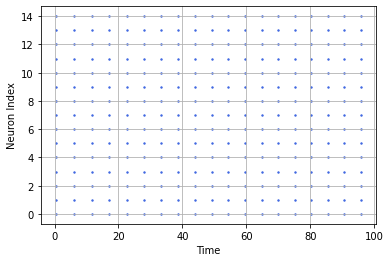

In [80]:
sf.raster_plot(spikes, dt = 0.05)

### try sin current

In [81]:
dt = 0.05

In [82]:
neurons_G3 = sf.LIFPopulation(n = 15, dt = dt)

In [83]:
connection_G3 = sf.Connection(pre=neurons_G3, post=neurons_G3, w = guassian_weight)

In [84]:
current = sin_current()

In [85]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_G3, neurons_G3)

In [86]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

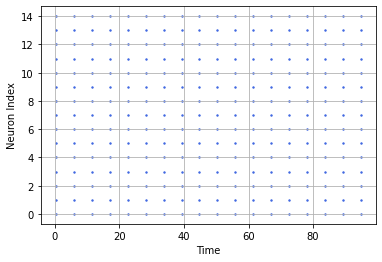

In [87]:
sf.raster_plot(spikes, dt = 0.05)

## ALL to ALL connection scaling with number of neurons

In [88]:
J0 = 5
N = 15

In [89]:
weights = torch.stack([torch.tensor([J0 / N] * N) for _ in range(N)], dim = 1)

we will start with constant current.

In [90]:
current = constant_cuurent()

In [91]:
dt = 1

In [92]:
neurons_A1 = sf.LIFPopulation(n = N, dt = dt)

In [93]:
connection_A1 = sf.Connection(pre =neurons_A1, post = neurons_A1, w = weights)

In [94]:
population_inner_current, population, spikes, voltage = process(current, connection_A1, neurons_A1)

In [95]:
population_inner_current

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

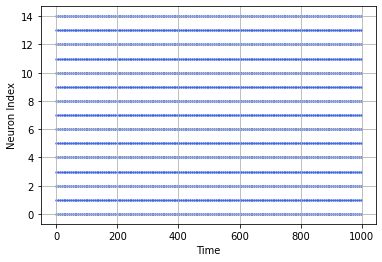

In [96]:
sf.raster_plot(spikes, dt = 1)

### step current

In [97]:
neurons_A2 = sf.LIFPopulation(n = 15, refrac_length=0, dt = 0.05)

In [98]:
connection_A2 = sf.Connection(pre = neurons_A2, post=neurons_A2, w = weights)

In [99]:
current = step_current()

In [100]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_A2, neurons_A2)

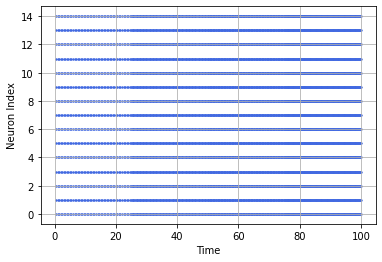

In [101]:
sf.raster_plot(spikes, dt = 0.05)

### sin connection

In [102]:
neurons_A3 = sf.LIFPopulation(n = 15, refrac_length=0, dt = 0.05)

In [103]:
connection_A3 = sf.Connection(pre = neurons_A3, post=neurons_A3, w = weights)

In [104]:
current = sin_current()

In [105]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_A3, neurons_A3)

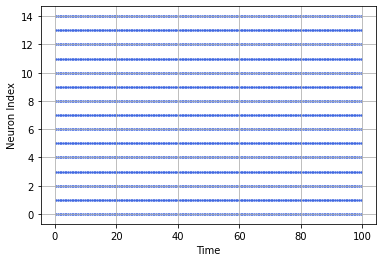

In [106]:
sf.raster_plot(spikes, dt = 0.05)

# Random connection with constant number of connections

In [116]:
import random

In [117]:
def generate_random():
    temp = [random.uniform(0,1) for _ in range(5)] + [0] * 10
    random.shuffle(temp)
    return torch.tensor(temp)


In [118]:
weight_tensors = torch.stack([generate_random() for _ in range(15)], dim = 1)

### constant current

In [119]:
neurons_R1 = sf.LIFPopulation(n = 15, refrac_length=3, dt = 1)

In [120]:
connection_R1 = sf.RandomConnection(pre = neurons_R1, post = neurons_R1, w= weight_tensors)

In [121]:
connection_R1.w

Parameter containing:
tensor([[0.0000, 0.0000, 0.8110, 0.3932, 0.8030, 0.9843, 0.0000, 0.0000, 0.0000,
         0.0000, 0.6055, 0.0000, 0.0089, 0.0000, 0.7799],
        [0.0000, 0.2572, 0.0000, 0.9140, 0.0000, 0.0000, 0.0000, 0.0000, 0.8340,
         0.8341, 0.0000, 0.0000, 0.0000, 0.0000, 0.5499],
        [0.0000, 0.0000, 0.0000, 0.6913, 0.6040, 0.0000, 0.9385, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5966, 0.0000, 0.0000],
        [0.3306, 0.0000, 0.9095, 0.0000, 0.0000, 0.0000, 0.0000, 0.5340, 0.4437,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.2196, 0.0000, 0.0709, 0.0298, 0.6743, 0.0000, 0.7269,
         0.0000, 0.6748, 0.9708, 0.0000, 0.5744, 0.7182],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7432, 0.1205, 0.3539,
         0.0000, 0.9458, 0.0000, 0.7038, 0.1578, 0.0000],
        [0.2938, 0.0374, 0.0000, 0.6887, 0.2279, 0.0000, 0.2547, 0.5999, 0.7418,
         0.0000, 0.0000, 0.0294, 0.0000, 0.0000, 0.0000],
     

In [122]:
current = constant_cuurent()

In [123]:
population_inner_current, population, spikes, voltage = process(current, connection_R1, neurons_R1)

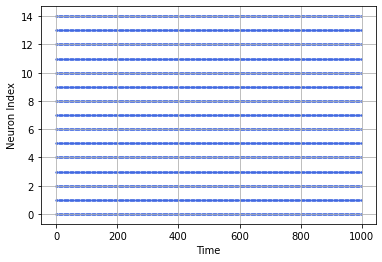

In [124]:
sf.raster_plot(spikes, dt = 1)

### step current

In [125]:
neurons_R2 = sf.LIFPopulation(n = 15, dt = 0.05, refrac_length=3)

In [130]:
current = step_current()

In [131]:
connection_R2 = sf.RandomConnection(pre = neurons_R2, post = neurons_R2, w = weight_tensors)

In [132]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_R2, neurons_R2)

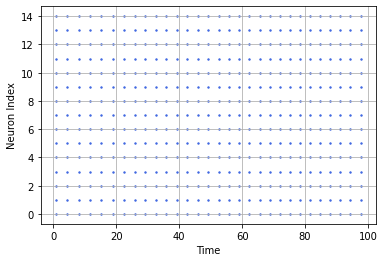

In [133]:
sf.raster_plot(spikes, dt = 0.05)

### sin current 

In [134]:
neurons_R3 = sf.LIFPopulation(n = 15, dt = 0.05, refrac_length=3)

In [139]:
connection_R3 = sf.RandomConnection(pre=neurons_R3, post=neurons_R3, w = weight_tensors)

In [140]:
current = sin_current()

In [141]:
population_inner_current, population, spikes, voltage = process(current['value'], connection_R3, neurons_R3)

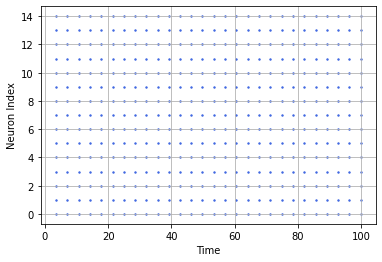

In [142]:
sf.raster_plot(spikes, dt = 0.05)

# Question 2

In [1]:
import torch
import synapticflow as sf
import math
import numpy as np
import random

In [2]:
# generate the popolations 
population_E1, population_E2 = sf.LIFPopulation(n = 5, refrac_length=3, dt = 1, tau_s=10), sf.LIFPopulation(n = 5, refrac_length=2, dt = 1, tau_s=10)
population_I = sf.LIFPopulation(n = 5,tau_s=1,dt = 1, refrac_length=1, is_inhibitory=True)

In [3]:
population_I.forward(torch.tensor(1))
population_I.s

tensor([True, True, True, True, True])

In [4]:
#set the connections between the individual population neurons(normal weights)
connection_I = sf.Connection(pre = population_I, post=population_I)
connection_E1 = sf.Connection(pre = population_E1, post=population_E1)
connection_E2 = sf.Connection(pre=population_E2, post = population_E2)

In [5]:
torch.clamp(torch.rand(5, 5), float('-inf'), float('inf'))

tensor([[0.3300, 0.2238, 0.7427, 0.4236, 0.0558],
        [0.0690, 0.3903, 0.7377, 0.3423, 0.4433],
        [0.5526, 0.7588, 0.2685, 0.8100, 0.2839],
        [0.5058, 0.5816, 0.2193, 0.5716, 0.2380],
        [0.1538, 0.4283, 0.8633, 0.8981, 0.5766]])

In [6]:
inhibitory_weight = torch.clamp(-1 * torch.rand(5, 5), float('-inf'), float(0))

In [7]:
inhibitory_weight

tensor([[-0.5126, -0.1082, -0.8032, -0.3914, -0.7105],
        [-0.3402, -0.3060, -0.7858, -0.9782, -0.8862],
        [-0.4994, -0.7714, -0.9429, -0.9864, -0.7317],
        [-0.4587, -0.6270, -0.2194, -0.8950, -0.3434],
        [-0.6915, -0.2661, -0.1181, -0.5592, -0.3454]])

In [8]:
# set the connection with other neurons populations
connection_IE1 = sf.Connection(pre = population_I, post = population_E1)
connection_EI1 = sf.Connection(pre = population_E1, post=population_I)
connection_IE2 = sf.Connection(pre = population_I, post=population_E2)
connection_EI2 = sf.Connection(pre = population_E2, post = population_I)

In [9]:
def process(current1 , current2, population_E1, population_E2, population_I, connection_E1, connection_E2, 
            connection_EI1, connection_EI2, connection_IE1, connection_IE2):
    # some list the store spikes data
    spikes_E1 = []
    spikes_E2 = []
    spikes_I = []
    # the inner communication of neurons
    inner_currentE1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_currentE2 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_IE1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_IE2 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_EI1 = torch.zeros_like(torch.tensor([0] * 5))
    inner_current_EI2 = torch.zeros_like(torch.tensor([0] * 5))
    for i in range(len(current1)):
        # E1
        curr1 = torch.tensor([current1[i]] * 5) + inner_currentE1 - inner_current_IE1 # pass the currents in first ecxitatory population
        population_E1.forward(curr1)
        spikes_e1 = population_E1.s
        inner_currentE1 = connection_E1.compute(spikes_e1)
        spikes_E1.append(spikes_e1)
        # E2
        curr2 = torch.tensor([current2[i]] * 5) + inner_currentE2 - inner_current_IE2 # second ecxitataory population
        population_E2.forward(curr2)
        spikes_e2 = population_E2.s
        inner_currentE2 = connection_E2.compute(spikes_e2)
        spikes_E2.append(spikes_e2)
        # EI1
        inner_current_EI1 = connection_EI1.compute(spikes_e1)
        inner_current_EI2 = connection_EI2.compute(spikes_e2)
        curr3 = inner_current_EI1 + inner_current_EI2 # calculating the inhibitory population input current
        population_I.forward(curr3)
        spikes_i = population_I.s
        spikes_I.append(spikes_i)
        inner_current_IE1 = connection_IE1.compute(spikes_i)
        inner_current_IE2 = connection_IE2.compute(spikes_i)
    return spikes_E1, spikes_E2, spikes_I

In [20]:
# generating current
current1 = [5] * 250
current2 = [5] * 250
random_noise = 0
random_noise2 = 0
for i in range(len(current1)):
    if i % 50 != 0:
        current1[i] += random_noise
        current2[i] += random_noise2
    else:
        random_noise = random.uniform(-5, 5)
        random_noise2 = random.uniform(-5, 5)

In [22]:
x1, x2, x3 = process(current1, current2, population_E1, population_E2, population_I, connection_E1, connection_E2, 
                     connection_EI1, connection_EI2, connection_IE1, connection_EI2)

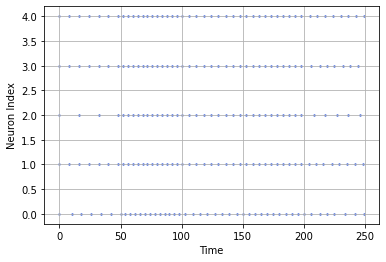

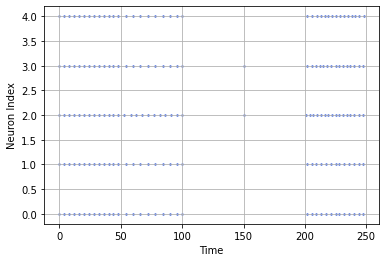

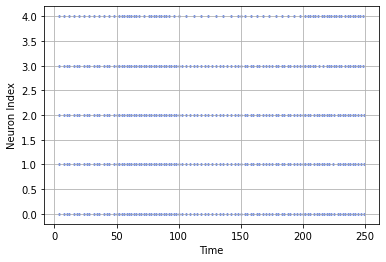

(None, None, None)

In [23]:
sf.raster_plot(x1, dt = 1), sf.raster_plot(x2, dt = 1), sf.raster_plot(x3, dt = 1)

# Question 3

In [115]:
import synapticflow as sf 
import torch
import matplotlib.pyplot as plt
import math
import numpy as np

# Poission encoding

In [116]:
current = [10] * 10

In [117]:
def process_1(input_curr, connection, population):
    inner_current = torch.zeros_like(torch.tensor([0] * population.n))
    spikes_n = []
    voltage_n = []
    for current in input_curr:
        curr = torch.tensor([current] * population.n) + inner_current
        population.forward(curr)
        spikes = population.s
        voltage_n.append(population.v)
        spikes_n.append(spikes)
        inner_current = connection.compute(spikes)
    return spikes_n

In [118]:
neurons = sf.LIFPopulation(n = 2, R = 20, tau_s=10, refrac_length=1, dt = 1)
connection = sf.Connection(pre=neurons, post=neurons)

In [119]:
spikes = process_1(current,connection, neurons)

In [120]:
spikes_1 = torch.vstack([torch.tensor(spike) for spike in spikes])

C:\Users\kara\AppData\Local\Temp\ipykernel_1216\461611717.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  spikes_1 = torch.vstack([torch.tensor(spike) for spike in spikes])


In [121]:
def poisson_encoding(rate, duration, time_step):
    time = np.arange(0, duration, time_step)
    num_steps = len(time)
    spike_train = []
    for i in range(num_steps):
        spikes = []
        spikes.append([np.random.poisson(rate[0] * time_step),np.random.poisson(rate[1] * time_step)]) 
        spike_train.append(spikes[0])
    
    return spike_train

In [122]:
rates = [spikes_1[:, 0].sum() / 10, spikes_1[:, 0].sum() / 10]

In [129]:
encoded_spikes = poisson_encoding(rates, 10, 1)

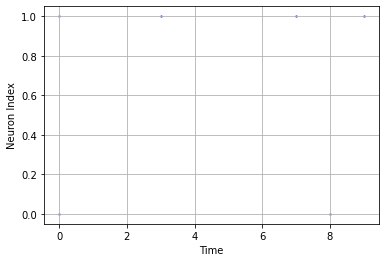

In [130]:
sf.raster_plot(encoded_spikes, dt = 1)

# Time to first spike encoding with constant current

in this encoding method, we can pass to function the desired time interval for calculating time to first spike of each neuron and it retuns the encoded spikes.

In [149]:
current = [10] * 10

In [135]:
import numpy as np

def time_to_first_spike_encoding(time_to_first_spike, duration, dt):
    time = np.arange(0, duration, dt)  # Time vector
    spike_train = time <= time_to_first_spike  # Generate spike train based on time-to-first-spike

    return spike_train

neuron_time_to_first_spikes = [0.2, 0.3]

duration = 10 
dt = 1 

population_spike_trains = []
for time_to_first_spike in neuron_time_to_first_spikes:
    spike_train = time_to_first_spike_encoding(time_to_first_spike, duration, dt)
    population_spike_trains.append(spike_train)

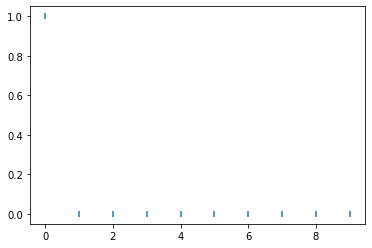

In [147]:
plt.scatter(x = np.arange(10), y = population_spike_trains[0], marker='|')

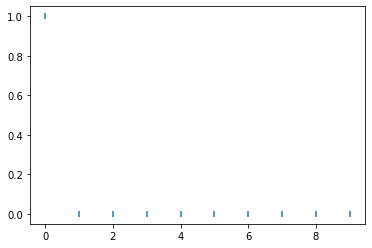

In [148]:
plt.scatter(x = np.arange(10), y = population_spike_trains[1], marker='|')

# Rank order encoding

in this method we should pass a desired order that we want to code of our spikes to function

In [150]:
def rank_order_encoding(input_values, num_neurons):
    sorted_indices = np.argsort(input_values)
    spike_trains = []

    for i in range(num_neurons):
        spike_train = np.zeros_like(input_values)
        spike_train[sorted_indices[i]] = 1
        spike_trains.append(spike_train)

    return spike_trains

In [151]:
order_list = [0, 1, 2, 3, 4]
encoded_spikes = rank_order_encoding(order_list, 5)

In [154]:
encoded_spikes

[array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 1])]

as we can see in matrix below, our spikes ordered by an ascending order.